# 1. INTRODUCCIÓN


---

En el siguiente escrito se analizará de manera exploratoria y se implementará un modelo de regresión lógistica a la base de datos "portugues.csv" que contiene 33 variables, 5 cuantitativas y 28 categóricas para seiscientas cuarenta y nueva observaciones. Se estimará si el estudiante paso o no la materia teniendo en cuenta que si la nota es mayor o igual a 12 pasa, sino, pierde la materia.

# 2 PREPROCESAMIENTO DE DATOS

---



Para el preprocesamiento de datos se encontró que habían valores faltantes en las variables "sex", "famsize", "Pstatus ", "Fjob", "Fjob", "nursery" y "higher" la cuales tuvieron 2,2,2,1,2,2,1,1 datos faltantes respectivamente, se decidió eliminar estas variables puesto que imputar estos datos no era muy coherente, se eliminaron 13 datos de 649 que tenia la base original y se realizará los demás procesos con 636 individuos sin ningún dato faltante en las 33 variables las cuales son 16 númericas y 17 ded tipo objeto .
También se verifico que la base de datos no tuviera datos duplicados y se normalizo las variables cuantitaivas por si se opta por incluirlas.
Además, se categorizó la variable G3 puesto que se desea predecir si el estudiante paso o no la materia de portugues dado que era númerica se  baso en como califican en portugal lo cual dio como resultado que si el estudiante sacaba 12 o más pasaban la materia (1) y si sacaban menos de 14 la perdían (0).
Se eliminó el individuo 67 puesto que en la variable 'Pstatus' puso la variable B teniendo en cuenta que solo se puede poner la letra A o T.



#  3. ANÁLISIS EXPLORATORIO


---



###2.1 SELECCIÓN DE VARIABLES

Para el análisis de las variables categoricas se optó por realizar tablas de contigencia entre cada variable categorica con la variable a predecir "G3" que indica si el estudiante paso o no, además, se baso en la PRUEBA DE INDEPENDENCIA DE CHI-CUADRADo:

$$ HO : Las \ variables \ son \ independientes. $$
$$ H1 : Las \ variables \ son \ dependientes. $$


Solo las variables "gouut", "famrel" "romantic", "nursey", "activities", "famsup", "guardian", "famsize" y "Pstatus" a un nivel de significancia del 5% rechazan la hipótesis nula de que son independientes con la variable "G3", es decir, dichas variables dependen significativamente de la variables a predecir "G3".

Para el análisis de las variables continuas se optó por realizar un matriz de correlaciones para verificar que entre ellas tengan poco correlación.

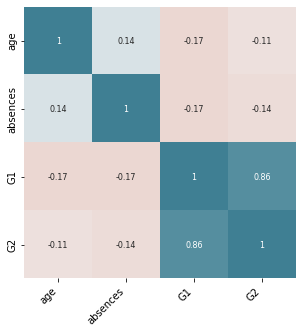

Como se evidencia en el gráfico anterior las variables G2 Y G3 tienen una alta correlación entre ellas, por ende, se descartan para la estimación del modelo, por otro lado, las variables "absences" y "age" tienen baja relación entre ellas, sin embargo, para verificar si se pueden incluir o no estas dos variables continuas se optó por realizar dos diagramas de caja con la variable a predecir "G3".

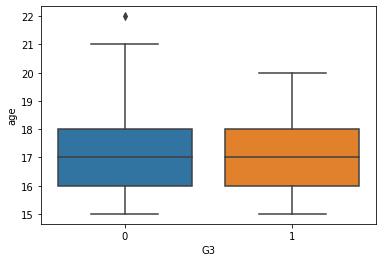

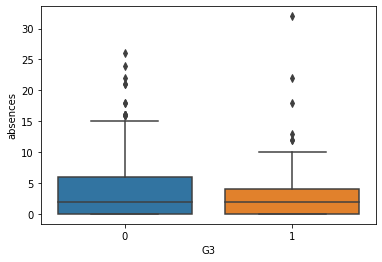

Como se observa en los gráficos anterior, las variable "age" y la variable "absences" no afecta significativamen la variable a predecir si el estudiante paso o no la materia.

En efeto, se decide crear el modelo con variables explicativas "Pdstatus","famsize", "famsup", "romantic" y "activities", cabe destacar que dichas variables son categoricas y se hará la respectiva transformación a variables dummies.

#4. MODELAMIENTO VARIABLE RESPUESTA

---



### 4.1 BASE DE DATOS COMPLETA

| Modelo                                      | Precisión | Eficacia |
|---------------------------------------------|-----------|----------|
| C = 0.0001, liblinear y por regresión lazzo | 0%        | 45.98%   |
| C = 0.5 y newton-cg y por regresión rigde   | 56.34%    | 55.59%   |
| C = 0.8 y sag                               | 56.21%    | 55.27%   |



### 4.2 PARTICIONANDO BASE DE DATOS EN (80%) ENTRENAMIENTO Y 20% TEST.
| Modelo                                      | Precisión | Eficacia |
|---------------------------------------------|-----------|----------|
| C = 0.0001, liblinear y por regresión lazzo | 0%        | 43.30%   |
| C = 0.5 y newton-cg y por regresión rigde   | 59.18%    | 57.48%   |
| C = 0.8 y sag                               | 59.18%    | 57.48%   |

### 4.3 K FOLD CROSS VALIDATION

| Modelo  | Precisión | Eficacia |
|---------|-----------|----------|
| K = 5   | 59.18%    | 57.48%   |
| K=10    | 59.18%    | 57.48%   |

Como se evidencia en las tablas anteriores, para la estimación de si el individuo pasa o no la materia portugues el mejor método a utilizar es usando el kfolds o particionando la base de datos en 80% y 20% y usando los parámetros (C = 0.5 - newton-cg - regresión rigde) o (C = 0.8 - sag) puesto que dichos modelos tienes una eficacia del 57.48% que indica la proporción de resultados verdaderos entre el número total de casos examinados y una proporción del 59.18% que indica la proporción de los positivos predichos es realmente positiva

# 5. ANEXOS 

---




### 5.1 IMPORTACIÓN BASE DE DATOS Y LIBRERIAS

In [ ]:
!pip install -U -q PyDrive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import cv2
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
from google.colab import drive
from matplotlib import cm
import altair as alt
import scipy.stats as stats
from ast import increment_lineno
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
portugues = pd.read_csv('/content/drive/MyDrive/student-por (1).csv', 
                 sep = ';',
                 error_bad_lines=False,
                 )
portugues.head()
portugues['G3'] = np.where(portugues.G3 >= 12, 1, 0)
portugues.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,1


### 5.2  PREPROCESAMIENTO DE LA BASE DE DATOS

In [ ]:
print('portugues')
print('Filas: ', portugues.shape[0])
print('Columnas: ', portugues.shape[1])

portugues
Filas:  649
Columnas:  33


In [ ]:
# Atributos y tipos de atributo
portugues.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
#DATOS FALTANTES
portugues.isnull().sum()

school        0
sex           2
age           0
address       0
famsize       2
Pstatus       2
Medu          0
Fedu          0
Mjob          0
Fjob          1
reason        0
guardian      2
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        2
paid          0
activities    0
nursery       1
higher        1
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
#ELIMINACIÓN DATOS FALTANTES
portugues1 = portugues.dropna()
portugues1.isnull().sum()
portugues1.reset_index(inplace=True)


In [ ]:
#DATOS DUPLICADOS
portugues1.duplicated()



0      False
1      False
2      False
3      False
4      False
       ...  
631    False
632    False
633    False
634    False
635    False
Length: 636, dtype: bool

In [ ]:
from sklearn import preprocessing

x = portugues1[['age','absences']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
portuguesnormal = pd.DataFrame(x_scaled, columns= ['aget','absencest'])
portuguesnormal.shape[0]

636

In [ ]:
df=pd.DataFrame(portugues1).join(portuguesnormal)
print(df)


     index school sex  age address famsize Pstatus  Medu  Fedu      Mjob  ...  \
0        0     GP   F   18       U     GT3       A     4     4   at_home  ...   
1        1     GP   F   17       U     GT3       T     1     1   at_home  ...   
2        2     GP   F   15       U     LE3       T     1     1   at_home  ...   
3        3     GP   F   15       U     GT3       T     4     2    health  ...   
4        4     GP   F   16       U     GT3       T     3     3     other  ...   
..     ...    ...  ..  ...     ...     ...     ...   ...   ...       ...  ...   
631    644     MS   F   19       R     GT3       T     2     3  services  ...   
632    645     MS   F   18       U     LE3       T     3     1   teacher  ...   
633    646     MS   F   18       U     GT3       T     1     1     other  ...   
634    647     MS   M   17       U     LE3       T     3     1  services  ...   
635    648     MS   M   18       R     LE3       T     3     2  services  ...   

    goout Dalc Walc  health

In [ ]:
#CONSISTENCIA
portugues1['Pstatus'].value_counts()

T    558
A     77
B      1
Name: Pstatus, dtype: int64

In [ ]:
portugues1[portugues1.Pstatus == 'B']
df1 = portugues1.drop([67],axis=0)
df1['Pstatus'].value_counts()

T    558
A     77
Name: Pstatus, dtype: int64

In [ ]:
df1['activities'].value_counts()
df1['activities']= df1['activities'].str.lower() 
df1['activities'].value_counts()

no     325
yes    310
Name: activities, dtype: int64

In [ ]:
df1['nursery'].value_counts()
df1['nursery']= df1['nursery'].str.lower() 
df1['nursery'].value_counts()

yes    509
no     126
Name: nursery, dtype: int64

In [ ]:
df1['famsup'].value_counts
df1['famsup']= df1['famsup'].str.lower() 
df1['famsup'].value_counts()

yes    391
no     244
Name: famsup, dtype: int64

In [ ]:
df1['romantic'].value_counts
df1['romantic']= df1['romantic'].str.lower() 
df1['romantic'].value_counts()

no     401
yes    234
Name: romantic, dtype: int64

In [ ]:
#VOLVER VARIABLES DUMMIES
df1['romantic'] = df1['romantic'].map({'no':0, 'yes':1}).astype(np.int)
df1['nursery'] = df1['nursery'].map({'no':0, 'yes':1}).astype(np.int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

In [ ]:
df1['activities'] = df1['activities'].map({'no':0, 'yes':1}).astype(np.int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
df1['famsup'] = df1['famsup'].map({'no':0, 'yes':1}).astype(np.int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
df1['Pstatus'] = df1['Pstatus'].map({'A':0, 'T':1}).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
df1.describe

<bound method NDFrame.describe of      index school sex  age address famsize  Pstatus  Medu  Fedu      Mjob  \
0        0     GP   F   18       U     GT3        0     4     4   at_home   
1        1     GP   F   17       U     GT3        1     1     1   at_home   
2        2     GP   F   15       U     LE3        1     1     1   at_home   
3        3     GP   F   15       U     GT3        1     4     2    health   
4        4     GP   F   16       U     GT3        1     3     3     other   
..     ...    ...  ..  ...     ...     ...      ...   ...   ...       ...   
631    644     MS   F   19       R     GT3        1     2     3  services   
632    645     MS   F   18       U     LE3        1     3     1   teacher   
633    646     MS   F   18       U     GT3        1     1     1     other   
634    647     MS   M   17       U     LE3        1     3     1  services   
635    648     MS   M   18       R     LE3        1     3     2  services   

     ... famrel freetime goout  Dalc  Wal

###5.3 ANÁLISIS EXPLORATORIO

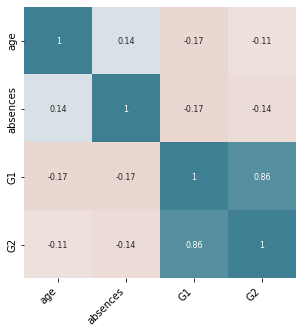

In [ ]:
# Heatmap matriz de correlaciones
portugues1_int = portugues1[['age','absences','G1','G2']]
cor =pd.DataFrame(round(portugues1_int.corr(),2))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    cor,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
tab1 = pd.crosstab(df1['G3'], df1['sex'])
stats.chi2_contingency(tab1) #no es significativa al 5%

(10.985978660712199,
 0.0009180379106236535,
 1,
 array([[171.98110236, 120.01889764],
        [202.01889764, 140.98110236]]))

In [ ]:
tab2 = pd.crosstab(df1['G3'], df1['school'])
stats.chi2_contingency(tab2) #no es significativa al 5%

(44.420860058373144,
 2.6484994695237456e-11,
 1,
 array([[189.45511811, 102.54488189],
        [222.54488189, 120.45511811]]))

In [ ]:
tab3 = pd.crosstab(df1['G3'], df1['address'])
stats.chi2_contingency(tab3) #no es significativa al 5%

(19.12468103716061,
 1.2245110997075645e-05,
 1,
 array([[ 90.12913386, 201.87086614],
        [105.87086614, 237.12913386]]))

In [ ]:
tab4 = pd.crosstab(df1['G3'], df1['Pstatus'])
stats.chi2_contingency(tab4) #es significativa al 5%

(0.0, 1.0, 1, array([[ 35.40787402, 256.59212598],
        [ 41.59212598, 301.40787402]]))

In [ ]:
tab5 = pd.crosstab(df1['G3'], df1['Medu'])
stats.chi2_contingency(tab5) #no es significativa al 5%

(45.80975319307317,
 2.6978946787300584e-09,
 4,
 array([[ 2.75905512, 64.83779528, 82.77165354, 62.9984252 , 78.63307087],
        [ 3.24094488, 76.16220472, 97.22834646, 74.0015748 , 92.36692913]]))

In [ ]:
tab6 = pd.crosstab(df1['G3'], df1['famsize'])
stats.chi2_contingency(tab6) #es significativa al 5%


(0.0, 1.0, 1, array([[204.17007874,  87.82992126],
        [239.82992126, 103.17007874]]))

In [ ]:
tab7 = pd.crosstab(df1['G3'], df1['Fedu'])
stats.chi2_contingency(tab7) #no es significativa al 5%

(32.599437455555865,
 1.4426505379914667e-06,
 4,
 array([[  3.21889764,  78.17322835,  95.64724409,  57.02047244,
          57.94015748],
        [  3.78110236,  91.82677165, 112.35275591,  66.97952756,
          68.05984252]]))

In [ ]:
tab8 = pd.crosstab(df1['G3'], df1['Mjob'])
stats.chi2_contingency(tab8) #no es significativa al 5%


(37.23481420556089,
 1.6114039824175854e-07,
 4,
 array([[ 60.23937008,  22.07244094, 115.88031496,  60.6992126 ,
          33.10866142],
        [ 70.76062992,  25.92755906, 136.11968504,  71.3007874 ,
          38.89133858]]))

In [ ]:
tab9 = pd.crosstab(df1['G3'], df1['Fjob'])
stats.chi2_contingency(tab9) #no es significativa al 5%

(14.345930831097627,
 0.006269030204850641,
 4,
 array([[ 18.39370079,  10.57637795, 165.54330709,  81.39212598,
          16.09448819],
        [ 21.60629921,  12.42362205, 194.45669291,  95.60787402,
          18.90551181]]))

In [ ]:
tab10 = pd.crosstab(df1['G3'], df1['reason'])
stats.chi2_contingency(tab10) #no es significativa al 5%

(24.23378402627251,
 2.232417808384463e-05,
 3,
 array([[126.91653543,  67.13700787,  32.6488189 ,  65.2976378 ],
        [149.08346457,  78.86299213,  38.3511811 ,  76.7023622 ]]))

In [ ]:
tab11 = pd.crosstab(df1['G3'], df1['guardian'])
stats.chi2_contingency(tab11) #es significativa al 5%

(6.037743727580771,
 0.048856303849644823,
 2,
 array([[ 68.97637795, 205.08976378,  17.93385827],
        [ 81.02362205, 240.91023622,  21.06614173]]))

In [ ]:
tab12 = pd.crosstab(df1['G3'], df1['traveltime'])
stats.chi2_contingency(tab12) #no es significativa al 5%

(23.462599970327144,
 3.233994013301396e-05,
 3,
 array([[164.16377953,  95.64724409,  24.83149606,   7.35748031],
        [192.83622047, 112.35275591,  29.16850394,   8.64251969]]))

In [ ]:
tab13 = pd.crosstab(df1['G3'], df1['studytime'])
stats.chi2_contingency(tab13) #no es significativa al 5%

(46.19584776503614,
 5.152926833825964e-10,
 3,
 array([[ 95.64724409, 138.41259843,  42.30551181,  15.63464567],
        [112.35275591, 162.58740157,  49.69448819,  18.36535433]]))

In [ ]:
tab14 = pd.crosstab(df1['G3'], df1['failures'])
stats.chi2_contingency(tab14) #no es significativa al 5%

(105.921589505773,
 8.277420035191331e-23,
 3,
 array([[247.39527559,  30.80944882,   7.35748031,   6.43779528],
        [290.60472441,  36.19055118,   8.64251969,   7.56220472]]))

In [ ]:
tab15 = pd.crosstab(df1['G3'], df1['schoolsup'])
stats.chi2_contingency(tab15) #no es significativa al 5%

(3.8272041438246873,
 0.28073765024829966,
 3,
 array([[  0.45984252,   0.45984252, 262.11023622,  28.97007874],
        [  0.54015748,   0.54015748, 307.88976378,  34.02992126]]))

In [ ]:
tab16 = pd.crosstab(df1['G3'], df1['famsup'])
stats.chi2_contingency(tab16) #es significativa al 5%

(0.14155928771053364, 0.706735763857929, 1, array([[112.2015748, 179.7984252],
        [131.7984252, 211.2015748]]))

In [ ]:
tab17 = pd.crosstab(df1['G3'], df1['paid'])
stats.chi2_contingency(tab17) #no es significativa al 5%

(0.044783156851163186,
 0.9778572522689193,
 2,
 array([[  0.91968504, 273.60629921,  17.47401575],
        [  1.08031496, 321.39370079,  20.52598425]]))

In [ ]:
tab18 = pd.crosstab(df1['G3'], df1['activities'])
stats.chi2_contingency(tab18) #es significativa al 5%

(9.209646496750416, 0.00240743175767072, 1, array([[149.4488189, 142.5511811],
        [175.5511811, 167.4488189]]))

In [ ]:
tab19 = pd.crosstab(df1['G3'], df1['nursery'])
stats.chi2_contingency(tab19) #es significativa al 5%

(2.278145061295673,
 0.13120871709588203,
 1,
 array([[ 57.94015748, 234.05984252],
        [ 68.05984252, 274.94015748]]))

In [ ]:
tab20 = pd.crosstab(df1['G3'], df1['higher'])
stats.chi2_contingency(tab20) #no es significativa al 5%

(63.2747506277085,
 1.7979426018480287e-15,
 1,
 array([[ 30.80944882, 261.19055118],
        [ 36.19055118, 306.80944882]]))

In [ ]:
tab21 = pd.crosstab(df1['G3'], df1['internet'])
stats.chi2_contingency(tab21) #no es significativa al 5%

(16.18043916943107,
 0.000306522442099484,
 2,
 array([[  0.45984252,  68.51653543, 223.02362205],
        [  0.54015748,  80.48346457, 261.97637795]]))

In [ ]:
tab22 = pd.crosstab(df1['G3'], df1['romantic'])
stats.chi2_contingency(tab22) #es significativa al 5%

(1.295942059818446, 0.2549557855699134, 1, array([[184.39685039, 107.60314961],
        [216.60314961, 126.39685039]]))

In [ ]:
tab23 = pd.crosstab(df1['G3'], df1['famrel'])
stats.chi2_contingency(tab23) #es significativa al 5%

(7.801327385533804,
 0.09913298481139508,
 4,
 array([[ 10.11653543,  12.87559055,  46.44409449, 142.5511811 ,
          80.01259843],
        [ 11.88346457,  15.12440945,  54.55590551, 167.4488189 ,
          93.98740157]]))

In [ ]:
tab24 = pd.crosstab(df1['G3'], df1['freetime'])
stats.chi2_contingency(tab24) #no es significativa al 5%

(13.919823890431157,
 0.007555390419835671,
 4,
 array([[ 20.69291339,  46.44409449, 113.12125984,  80.47244094,
          31.26929134],
        [ 24.30708661,  54.55590551, 132.87874016,  94.52755906,
          36.73070866]]))

In [ ]:
tab25 = pd.crosstab(df1['G3'], df1['goout'])
stats.chi2_contingency(tab25) #es significativa al 5%

(14.025571823451852,
 0.007213886666033975,
 4,
 array([[ 21.61259843,  65.75748031,  91.96850394,  62.53858268,
          50.12283465],
        [ 25.38740157,  77.24251969, 108.03149606,  73.46141732,
          58.87716535]]))

In [ ]:
tab26 = pd.crosstab(df1['G3'], df1['Dalc'])
stats.chi2_contingency(tab26) #no es significativa al 5%

(31.81683768579529,
 2.0852804807429268e-06,
 4,
 array([[201.87086614,  55.18110236,  19.31338583,   7.81732283,
           7.81732283],
        [237.12913386,  64.81889764,  22.68661417,   9.18267717,
           9.18267717]]))

In [ ]:
tab27 = pd.crosstab(df1['G3'], df1['Walc'])
stats.chi2_contingency(tab27) #no es significativa al 5%

(25.188887466139075,
 4.60960832852526e-05,
 4,
 array([[110.36220472,  67.13700787,  54.72125984,  39.08661417,
          20.69291339],
        [129.63779528,  78.86299213,  64.27874016,  45.91338583,
          24.30708661]]))

In [ ]:
tab28 = pd.crosstab(df1['G3'], df1['health'])
stats.chi2_contingency(tab28) #no es significativa al 5%

(9.52284925169549,
 0.04927985752739095,
 4,
 array([[ 40.92598425,  34.9480315 ,  55.64094488,  48.28346457,
         112.2015748 ],
        [ 48.07401575,  41.0519685 ,  65.35905512,  56.71653543,
         131.7984252 ]]))

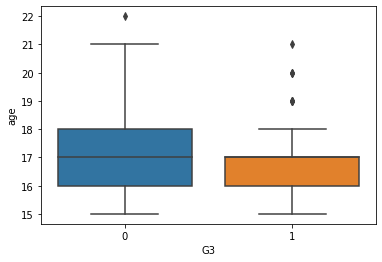

In [ ]:
seaborn.boxplot(x='G3', y='age', data=df1)

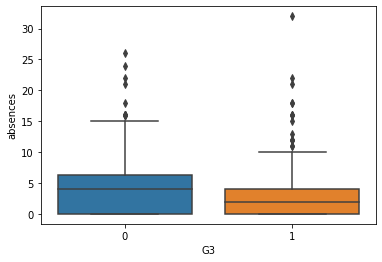

In [ ]:
seaborn.boxplot(x='G3', y='absences', data=df1)

### 5.4 MODELAMIENTO DE LA VARIABLE RESPUESTA

In [ ]:
df1[feature_cols].reset_index(drop=True)

,romantic,Pstatus,nursery,famsup,activities
0,0,0,1,0,0
1,0,1,0,1,0
2,0,1,1,0,0
3,1,1,1,1,1
4,0,1,1,1,0
...,...,...,...,...,...
630,0,1,0,0,1
631,0,1,1,1,0
632,0,1,1,0,1
633,0,1,0,0,0


In [ ]:
#PUNTO A
from sklearn.linear_model import LogisticRegression
feature_cols = ['romantic', 'Pstatus','nursery','famsup','activities']
X = df1[feature_cols]
y = df1['G3']
logreg = LogisticRegression(C=0.001, penalty='l1',solver='liblinear')
logreg.fit(X, y)
yp = logreg.predict_proba(X)
print('1. Exactitud con C = 0.0001 y liblinear:', metrics.log_loss(y, yp))
logreg2 = LogisticRegression(C=0.5, penalty='l2',solver='newton-cg')
logreg2.fit(X, y)
yp2 = logreg2.predict_proba(X)
print('2. Exactitud con C = 0.5 y newton-cg:', metrics.log_loss(y, yp2))
logreg3 = LogisticRegression(C=1, penalty='none',solver='sag')
logreg3.fit(X, y)
yp3 = logreg3.predict_proba(X)
print('3. Exactitud con C = 0.8 y sag:', metrics.log_loss(y, yp3))

1. Exactitud con C = 0.0001 y liblinear: 0.6931471805599453
2. Exactitud con C = 0.5 y newton-cg: 0.678806643333078
3. Exactitud con C = 0.8 y sag: 0.6787705648151169


In [ ]:
#PUNTO A
from sklearn.linear_model import LogisticRegression
feature_cols = ['romantic', 'Pstatus','nursery','famsup','activities']
X = df1[feature_cols]
y = df1['G3']
logreg = LogisticRegression(C=0.001,solver='liblinear', penalty='l1')
logreg.fit(X, y)
yp = logreg.predict(X)
print('1. Exactitud con C = 0.0001, liblinear y por regresión lazzo:', metrics.recall_score(y, yp))
print('1. Precision con C = 0.0001 y liblinear y por regresión lazzo:',metrics.precision_score(y, yp))
logreg2 = LogisticRegression(C=0.5,solver='newton-cg',penalty='l2')
logreg2.fit(X, y)
yp2 = logreg2.predict(X)
print('2. Exactitud con C = 0.5 y newton-cg y por regresión rigde:', metrics.recall_score(y, yp2))
print('2. Precision con C = 0.5 y newton-cg y por regresión rigde:',metrics.precision_score(y, yp2))
logreg3 = LogisticRegression(C=1,solver='sag',penalty='none')
logreg3.fit(X, y)
yp3 = logreg3.predict(X)
print('3. Exactitud con C = 0.8 y sag:', metrics.recall_score(y, yp3))
print('3. Precision con 0.8 y sag:', metrics.precision_score(y, yp3))


1. Exactitud con C = 0.0001, liblinear y por regresión lazzo: 0.45984251968503936
1. Precision con C = 0.0001 y liblinear y por regresión lazzo: 0.0
2. Exactitud con C = 0.5 y newton-cg y por regresión rigde: 0.5559055118110237
2. Precision con C = 0.5 y newton-cg y por regresión rigde: 0.5634095634095634
3. Exactitud con C = 0.8 y sag: 0.552755905511811
3. Precision con 0.8 y sag: 0.5621052631578948


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#PUNTO B
# Train-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
logreg4 = LogisticRegression(C=0.001,solver='liblinear', penalty='l1')
logreg4.fit(X_train, y_train)
yp4 = logreg4.predict(X_test)
print('1. Exactitud con C = 0.0001, liblinear y por regresión lazzo:', metrics.recall_score(y_test, yp4))
print('1. Precision con C = 0.0001, liblinear y por regresión lazzo:', metrics.precision_score(y_test, yp4))
logreg5 = LogisticRegression(C=0.5,solver='newton-cg',penalty='l2')
logreg5.fit(X_train, y_train)
yp5 = logreg5.predict(X_test)
print('2. Exactitud con C = 0.5 y newton-cg y por regresión rigde:', metrics.recall_score(y_test, yp5))
print('2. Precision con C = 0.5 y newton-cg y por regresión rigde:', metrics.precision_score(y_test, yp5))
logreg6 = LogisticRegression(C=1,solver='sag',penalty='none')
logreg6.fit(X_train, y_train)
yp6 = logreg6.predict(X_test)
print('3. Exactitud con C = 0.8 y sag:', metrics.recall_score(y_test, yp6))
print('3. Precision con C = 0.8 y sag:', metrics.precision_score(y_test, yp6))

1. Exactitud con C = 0.0001, liblinear y por regresión lazzo: 0.0
1. Precision con C = 0.0001, liblinear y por regresión lazzo: 0.0
2. Exactitud con C = 0.5 y newton-cg y por regresión rigde: 0.8055555555555556
2. Precision con C = 0.5 y newton-cg y por regresión rigde: 0.5918367346938775
3. Exactitud con C = 0.8 y sag: 0.8055555555555556
3. Precision con C = 0.8 y sag: 0.5918367346938775


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#PUNTO C
#K fold cross entrenamiento k=2
logreg7 = LogisticRegression()
cv = KFold(n_splits=5, random_state= 123456789, shuffle=True)
scores = cross_val_score(logreg7, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)# le paso mi modelo, mis x y y, toca meter que parametro quiero usar con el scorin
logreg7.fit(X_train, y_train)
y_predict = logreg7.predict(X_test)
print('Precisión:', metrics.precision_score(y_test, y_predict))
print('Recall:', metrics.recall_score(y_test, y_predict))
logreg8 = LogisticRegression()
cv1 = KFold(n_splits=10, random_state= 123456789, shuffle=True)
scores = cross_val_score(logreg8, X_train, y_train, scoring='precision', cv=cv1, n_jobs=-1)# le paso mi modelo, mis x y y, toca meter que parametro quiero usar con el scorin
logreg8.fit(X_train, y_train)
y_predict8 = logreg8.predict(X_test)
print('Precisión:', metrics.precision_score(y_test, y_predict8))
print('Recall:', metrics.recall_score(y_test, y_predict8))

Precisión: 0.5918367346938775
Eficacia: 0.8055555555555556
Precisión: 0.5918367346938775
Eficacia: 0.8055555555555556


# REFERENCIAS


---



https://realpython.com/logistic-regression-python/#logistic-regression-in-python-with-scikit-learn-example-1
https://pandas.pydata.org/docs/reference/api/pandas.concat.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


